In [14]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

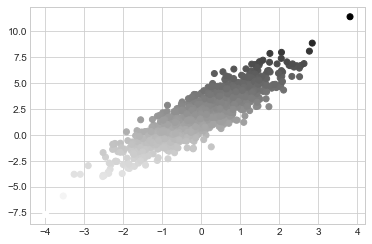

In [15]:
def gen(w,b,num):
    x = np.random.normal(0,1,(num,w.shape[0]))
    y = np.dot(x,w)+b
    y += np.random.normal(0,0.01,y.shape)
    return x,y

true_w,true_b = np.array([1,2]), 2
x,y = gen(true_w,true_b,1000)
# print(x)
# print(y)
plt.scatter(x[:,1],y[:],c=y)

In [ ]:
def data_loader(x,y,batch_size):
    